In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
data["age"].fillna(value=data["age"].mean(), inplace=True)

In [6]:
columns = ["survived","pclass","sex","age","fare"]
df = data[columns]
df.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


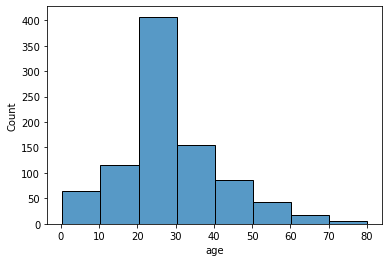

In [7]:
ax = sns.histplot(df["age"],bins = 8)

### Create a Age Categories
#### Children: (00-14 years) ,Youth: (15-24 years) ,Adults: (25-64 years) ,Seniors: (65 years and over) 

In [8]:
def age_group(x):
    if x <= 14:
        res = "child"
    elif  14< x <=24:
        res = "youth"
    elif 25< x <= 64:
        res = "adults"
    else:
        res = "senior"
    return res

pd.options.mode.chained_assignment = None # with this code do not need to create a copy and stoped pd warning

df["age_gr"]  = df["age"].apply(lambda x: age_group(x))
df.head()

,survived,pclass,sex,age,fare,age_gr
0,0,3,male,22.0,7.2500,youth
1,1,1,female,38.0,71.2833,adults
2,1,3,female,26.0,7.9250,adults
3,1,1,female,35.0,53.1000,adults
4,0,3,male,35.0,8.0500,adults


In [9]:
age_group = ["child","youth","adults","senior"]
age_dict = {}

for i in age_group:
    
    per = (len(df[df["age_gr"] == i])/len(df))*100
    
    age_dict.update({i:round(per)})

print(age_dict)

{'child': 9, 'youth': 22, 'adults': 65, 'senior': 4}


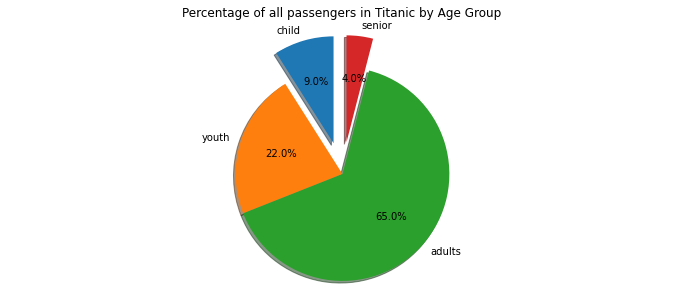

In [10]:
sizes = age_dict.values()

labels = age_dict.keys()

explode = (0.3, 0, 0, 0.3) 

fig1, ax = plt.subplots(figsize=(12,5))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of all passengers in Titanic by Age Group")
plt.show()


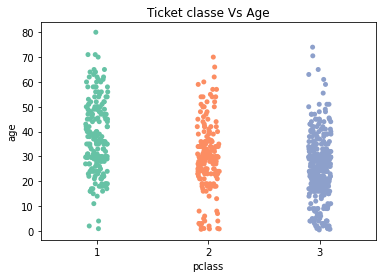

In [11]:
ax = sns.stripplot(x="pclass",y="age",data=df,palette='Set2')
ax.set_title("Ticket classe Vs Age");

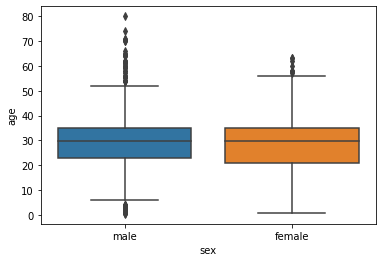

In [12]:
ax = sns.boxplot(x=df["sex"],y=df["age"])

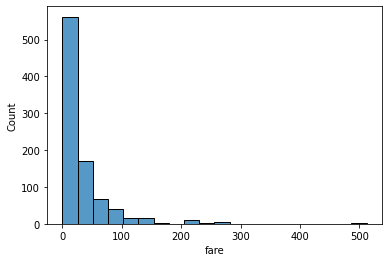

In [13]:
ax = sns.histplot(df["fare"],bins = 20)

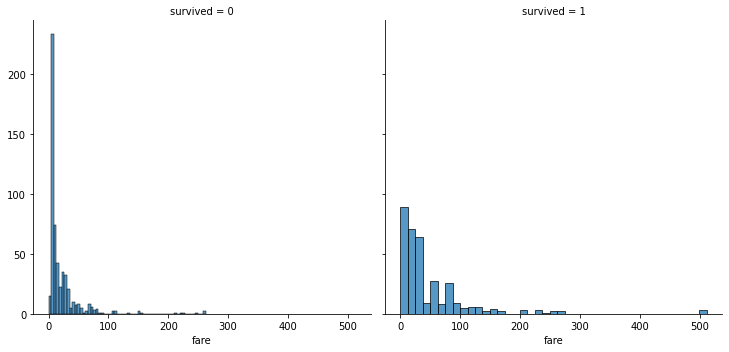

In [14]:
g = sns.FacetGrid(df, col="survived",col_wrap=4, height=5)
g.map(sns.histplot, "fare");

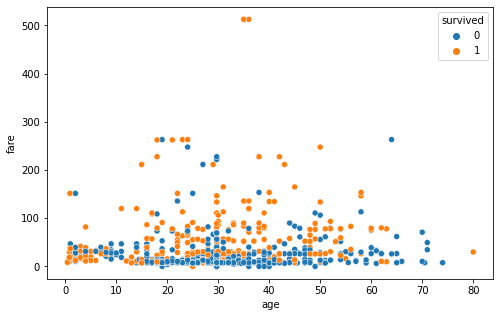

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
ax =sns.scatterplot(x= "age",y="fare",hue = "survived",data = df)

In [16]:
filt_first_class = (df["pclass"] == 1)
first_class = df[filt_first_class]
first_class.head()

,survived,pclass,sex,age,fare,age_gr
1,1,1,female,38.0,71.2833,adults
3,1,1,female,35.0,53.1000,adults
6,0,1,male,54.0,51.8625,adults
11,1,1,female,58.0,26.5500,adults
23,1,1,male,28.0,35.5000,adults


In [17]:
filt_second_class = (df["pclass"] == 2)
second_class = df[filt_second_class]
second_class.head()

,survived,pclass,sex,age,fare,age_gr
9,1,2,female,14.000000,30.0708,child
15,1,2,female,55.000000,16.0000,adults
17,1,2,male,29.699118,13.0000,adults
20,0,2,male,35.000000,26.0000,adults
21,1,2,male,34.000000,13.0000,adults


In [18]:
filt_third_class = (df["pclass"] == 3)
third_class = df[filt_third_class]
third_class.head()

,survived,pclass,sex,age,fare,age_gr
0,0,3,male,22.000000,7.2500,youth
2,1,3,female,26.000000,7.9250,adults
4,0,3,male,35.000000,8.0500,adults
5,0,3,male,29.699118,8.4583,adults
7,0,3,male,2.000000,21.0750,child


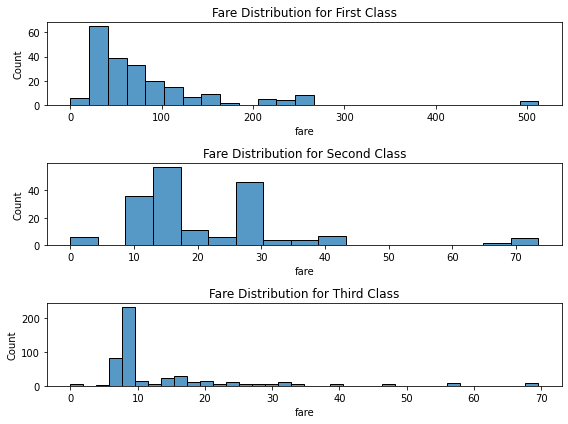

In [19]:
fig, ax = plt.subplots(3,1,figsize=(8,6))
sns.histplot(first_class['fare'],ax = ax[0])
ax[0].set_title("Fare Distribution for First Class")

sns.histplot(second_class['fare'],ax = ax[1])
ax[1].set_title("Fare Distribution for Second Class")

sns.histplot(third_class['fare'],ax = ax[2])
ax[2].set_title("Fare Distribution for Third Class")
plt.tight_layout()
plt.show()

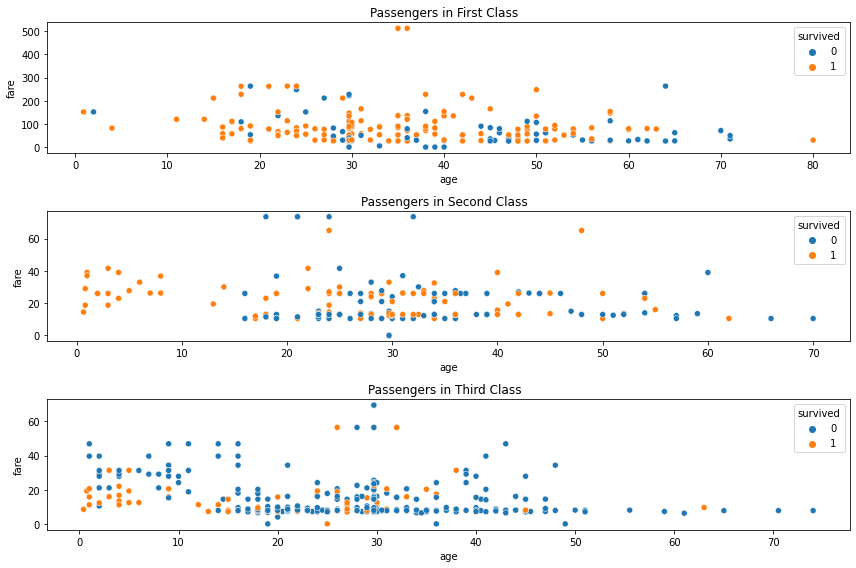

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
 
sns.scatterplot(x='age',y= 'fare',hue = "survived", data = first_class,ax =ax[0])
sns.scatterplot(x='age',y= 'fare',hue = "survived", data = second_class,  ax = ax[1])
sns.scatterplot(x='age',y= 'fare',hue = "survived", data = third_class,ax =ax[2])
ax[0].set_title("Passengers in First Class  ")
ax[1].set_title("Passengers in Second Class  ")
ax[2].set_title("Passengers in Third Class  ")

fig.tight_layout()
plt.show()

### Convert categorical variable into dummy

In [21]:
df_dum = pd.get_dummies(df,columns =["sex","age_gr"])

df_dum.rename(columns={"sex_female":"female","sex_male":"male","age_gr_adults":"adults","age_gr_child":"child","age_gr_senior":"senior",
                       "age_gr_youth":"youth"},inplace = True)

df_dum.head()

,survived,pclass,age,fare,female,male,adults,child,senior,youth
0,0,3,22.0,7.2500,0,1,0,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,1,0,0,0
3,1,1,35.0,53.1000,1,0,1,0,0,0
4,0,3,35.0,8.0500,0,1,1,0,0,0


In [22]:
corr = df_dum.corr()
corr

,survived,pclass,age,fare,female,male,adults,child,senior,youth
survived,1.000000,-0.338481,-0.069809,0.257307,0.543351,-0.543351,-0.025363,0.126851,-0.076438,-0.020840
pclass,-0.338481,1.000000,-0.331339,-0.549500,-0.131900,0.131900,-0.148397,0.115845,-0.019376,0.100669
age,-0.069809,-0.331339,1.000000,0.091566,-0.084153,0.084153,0.620566,-0.567934,0.145618,-0.394824
fare,0.257307,-0.549500,0.091566,1.000000,0.182333,-0.182333,0.023438,-0.001708,-0.027868,-0.012672
female,0.543351,-0.131900,-0.084153,0.182333,1.000000,-1.000000,-0.059332,0.090837,-0.088700,0.047960
male,-0.543351,0.131900,0.084153,-0.182333,-1.000000,1.000000,0.059332,-0.090837,0.088700,-0.047960
adults,-0.025363,-0.148397,0.620566,0.023438,-0.059332,0.059332,1.000000,-0.418982,-0.275460,-0.732889
child,0.126851,0.115845,-0.567934,-0.001708,0.090837,-0.090837,-0.418982,1.000000,-0.062191,-0.165466
senior,-0.076438,-0.019376,0.145618,-0.027868,-0.088700,0.088700,-0.275460,-0.062191,1.000000,-0.108786
youth,-0.020840,0.100669,-0.394824,-0.012672,0.047960,-0.047960,-0.732889,-0.165466,-0.108786,1.000000


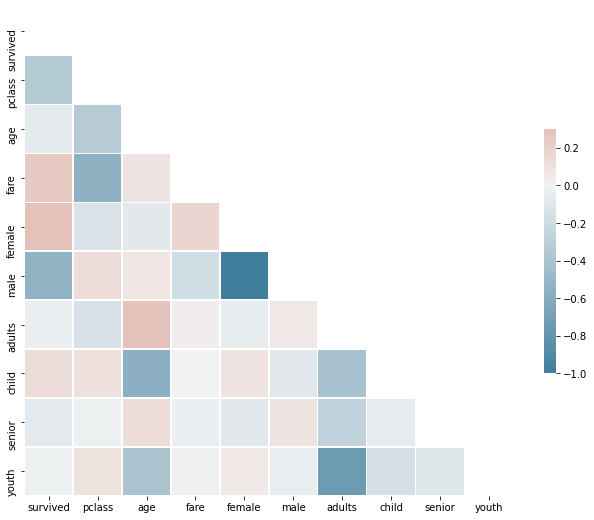

In [23]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Creat a new DataFrame for Survived passengers

In [24]:
table = pd.pivot_table(df, values=["survived"], index=["age_gr","pclass","sex"],aggfunc={"sex":"count",
                                                                                         "survived": "sum"})
table.rename(columns = {"sex": "total passenger"},inplace = True)
table.reset_index(inplace =True)
table.head()

,age_gr,pclass,sex,total passenger,survived
0,adults,1,female,66,65
1,adults,1,male,102,37
2,adults,2,female,47,42
3,adults,2,male,70,7
4,adults,3,female,79,39


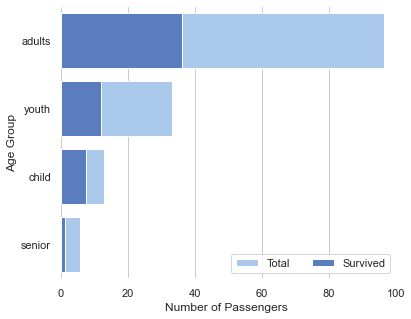

In [25]:
Table = table.sort_values("total passenger", ascending=False)


sns.set_color_codes("dark")
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 5))
sns.set_color_codes("pastel")
sns.barplot(x="total passenger", y="age_gr", data=Table,
            label="Total", color="b",ci = None) # ci is Size of confidence intervals to draw around estimated values

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="survived", y="age_gr", data=Table,
            label="Survived", color="b",ci = None)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="Age Group",
       xlabel="Number of Passengers ")

sns.despine(left=True, bottom=True)